In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
filepath1 = "/Users/e/DATA3402.Fall.2024/Labs/Kaggle.Data.Project/widsdatathon2024-challenge1/training.csv"
filepath2 = "/Users/e/DATA3402.Fall.2024/Labs/Kaggle.Data.Project/widsdatathon2024-challenge1/test.csv"

In [4]:
df_train = pd.read_csv(filepath1)
df_test = pd.read_csv(filepath2)

# EDA: Test

In [139]:
df_test.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,NaN,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
4,687972,Black,NaN,CA,900,40,F,23.0,C50412,Malig neoplasm of upper-outer quadrant of left...,...,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261


In [141]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Data columns (total 82 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             5792 non-null   int64  
 1   patient_race                           2891 non-null   object 
 2   payer_type                             5032 non-null   object 
 3   patient_state                          5771 non-null   object 
 4   patient_zip3                           5792 non-null   int64  
 5   patient_age                            5792 non-null   int64  
 6   patient_gender                         5792 non-null   object 
 7   bmi                                    1777 non-null   float64
 8   breast_cancer_diagnosis_code           5792 non-null   object 
 9   breast_cancer_diagnosis_desc           5792 non-null   object 
 10  metastatic_cancer_diagnosis_code       5792 non-null   object 
 11  meta

In [ ]:
df_

# EDA: Train

In [5]:
df_train.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


In [6]:
df_train.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
count,12906.000000,12906.000000,12906.000000,3941.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,...,12905.000000,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12877.000000,12877.000000,12877.000000,12906.000000
mean,547381.196033,573.754300,59.183326,28.984539,20744.441237,1581.950419,40.502259,11.122784,12.945265,13.290376,...,13.335299,13.406950,4.474956,27.978387,8.575284,7.083376,39.822352,7.475221,16.098988,0.624516
std,260404.959974,275.447534,13.335216,5.696906,13886.903756,2966.305306,4.036963,1.512376,1.923974,3.354103,...,3.690949,5.222495,4.837085,5.083939,4.203482,3.109022,3.559492,1.516499,5.842501,0.484266
min,100063.000000,101.000000,18.000000,14.000000,635.545455,0.916667,20.600000,0.000000,6.314286,5.925000,...,4.600000,3.433333,0.000000,12.460784,2.440000,1.200000,30.939316,2.636008,2.760371,0.000000
25%,321517.000000,331.000000,50.000000,24.660000,9463.896552,171.857143,37.129825,10.160000,11.741176,11.013415,...,10.270492,9.663333,0.994444,24.933333,5.618750,4.929688,37.698880,6.651215,11.280694,0.000000
50%,543522.000000,554.000000,59.000000,28.190000,19154.190480,700.337500,40.639344,11.039216,12.923944,12.538095,...,12.884000,12.177778,2.747222,27.788235,7.465714,6.847059,39.108249,7.686577,15.589148,1.000000
75%,772671.750000,846.000000,67.000000,32.920000,30021.278690,1666.515385,42.934783,12.190000,14.019767,14.971053,...,15.555405,16.635556,5.976000,30.709375,10.617442,8.620000,41.136513,8.276922,20.801880,1.000000
max,999896.000000,999.000000,91.000000,85.000000,71374.131580,21172.000000,54.570000,17.675000,35.300000,62.100000,...,35.155556,38.347826,26.755000,48.020000,27.566102,25.200000,52.237210,11.169408,31.504775,1.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

In [8]:
df_train['patient_race'].value_counts()

patient_race
White       3588
Black       1056
Hispanic     829
Other        683
Asian        365
Name: count, dtype: int64

In [9]:
df_train.shape

(12906, 83)

In [10]:
df_train['payer_type'].value_counts()

payer_type
COMMERCIAL            6032
MEDICAID              2569
MEDICARE ADVANTAGE    2502
Name: count, dtype: int64

In [11]:
df_train.isnull().sum()

patient_id           0
patient_race      6385
payer_type        1803
patient_state       51
patient_zip3         0
                  ... 
veteran              1
Ozone               29
PM25                29
N02                 29
DiagPeriodL90D       0
Length: 83, dtype: int64

In [12]:
df_train['DiagPeriodL90D'].value_counts()

DiagPeriodL90D
1    8060
0    4846
Name: count, dtype: int64

## Data Visualization

### Box Plots

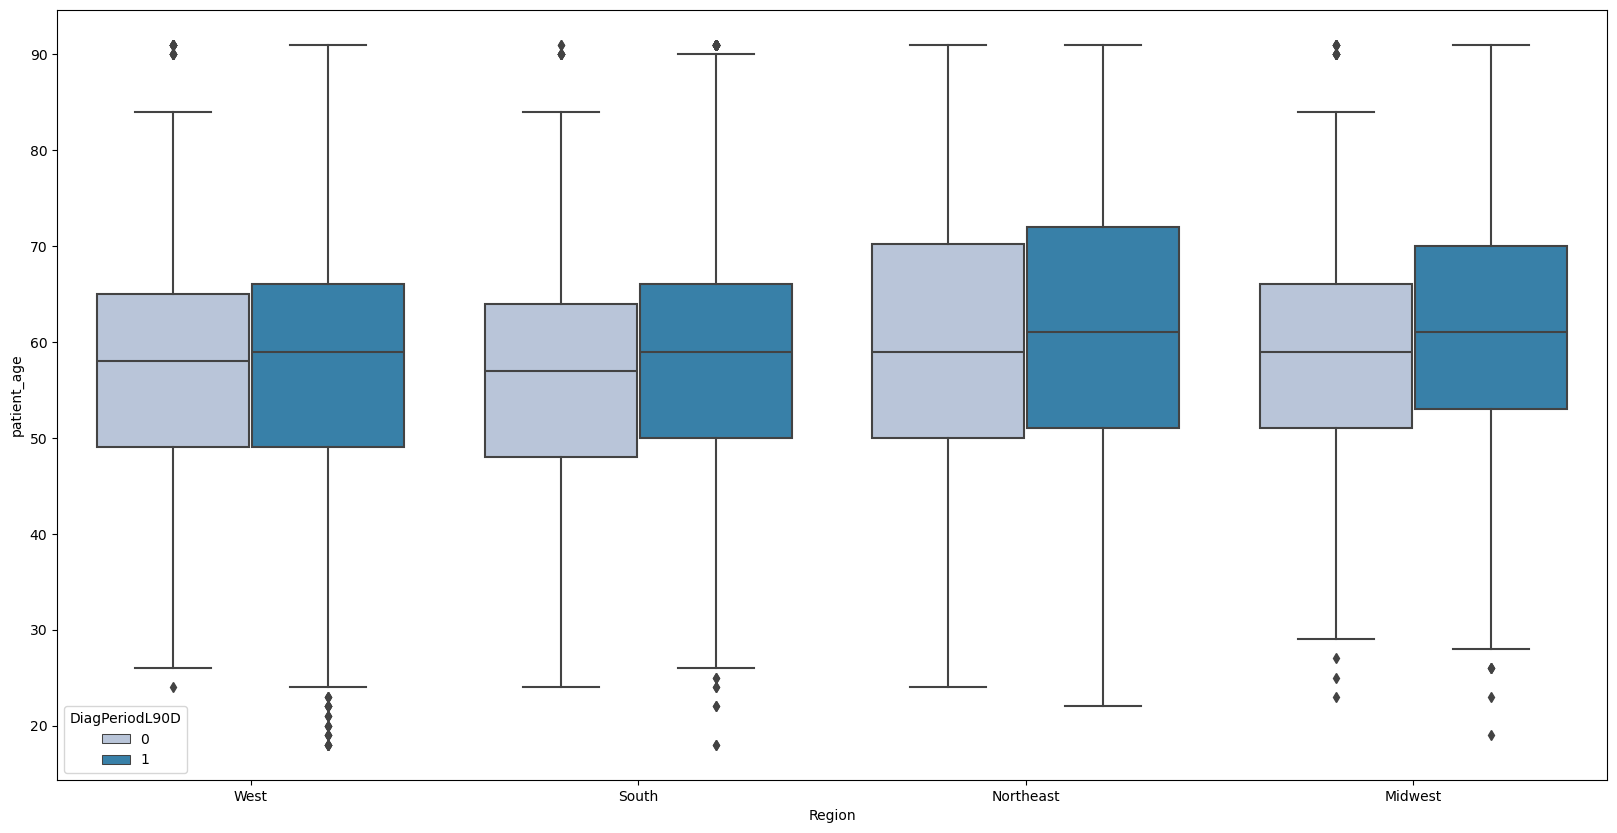

In [15]:
plt.figure(figsize = (20,10))
sns.boxplot(data = df_train, x = 'Region' , y = 'patient_age', hue = 'DiagPeriodL90D', palette = 'PuBu')
plt.show()

In [16]:
def boxplot(x):
    plt.figure(figsize = (10,7))
    sns.boxplot(data = df_train, x = 'DiagPeriodL90D' , y = df_train[x], palette = 'PuBu')
    plt.show()

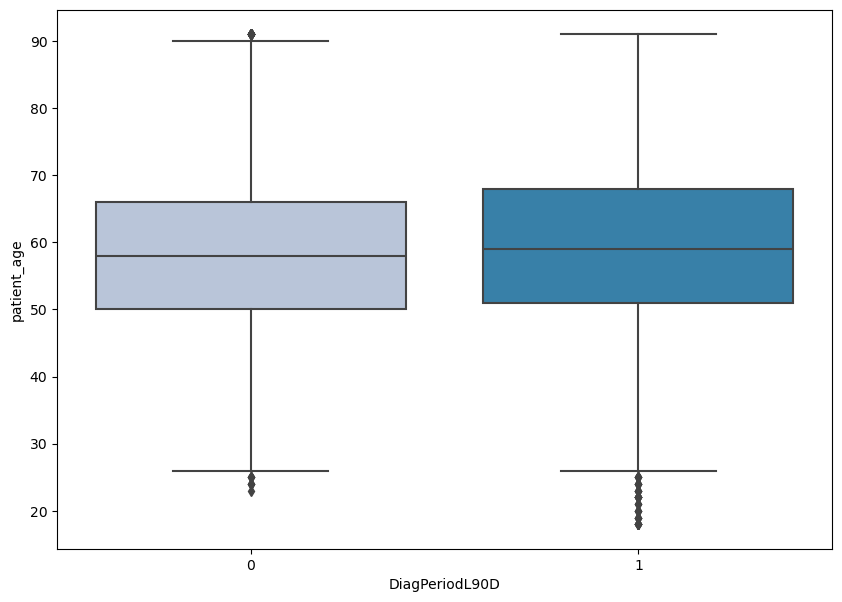

In [17]:
boxplot('patient_age')

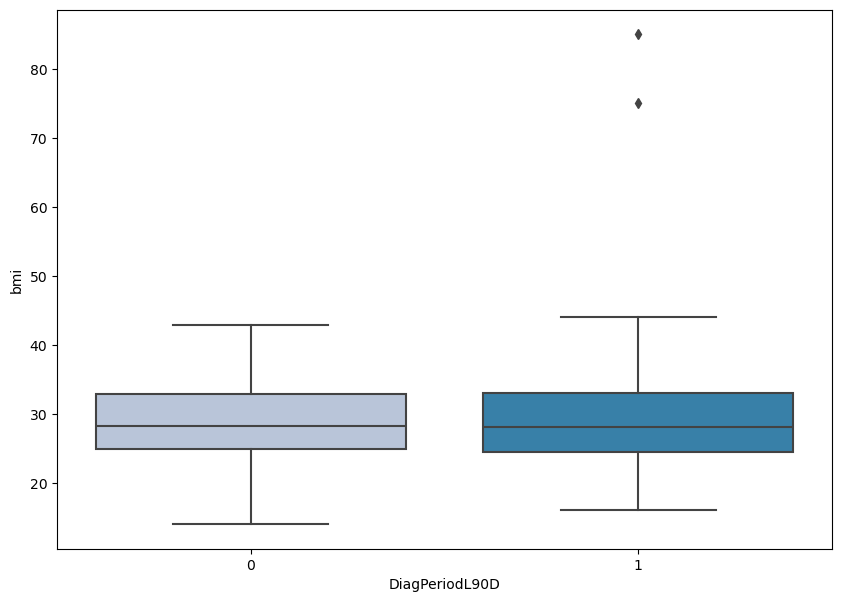

In [18]:
boxplot('bmi')

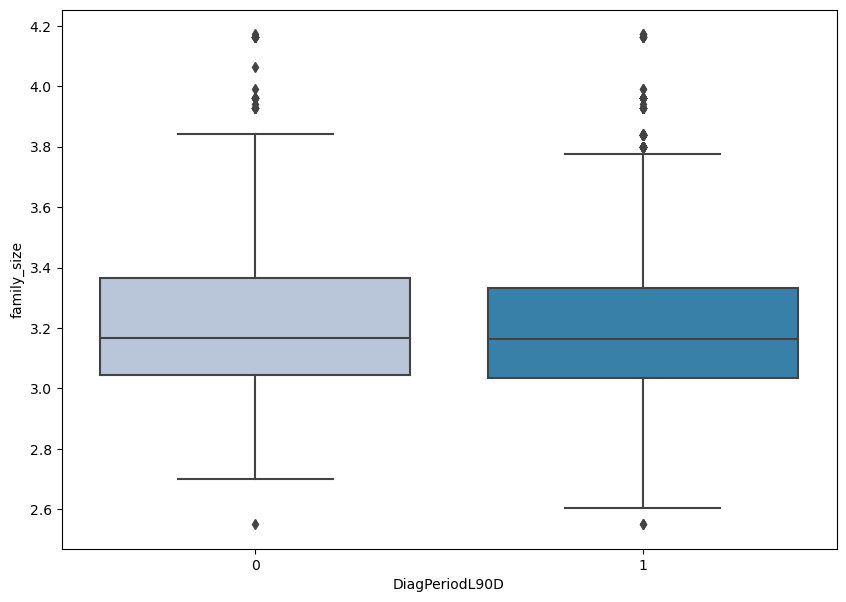

In [19]:
boxplot('family_size')

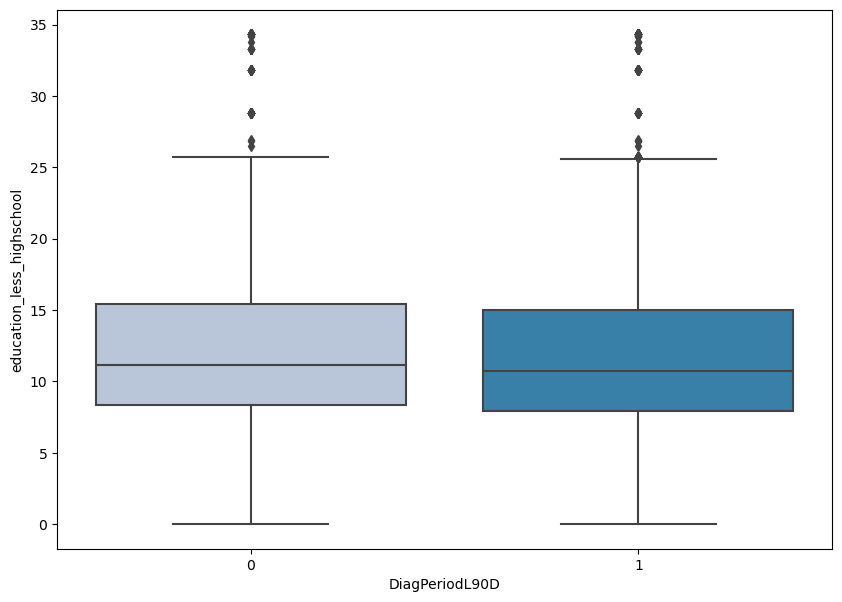

In [20]:
boxplot('education_less_highschool')

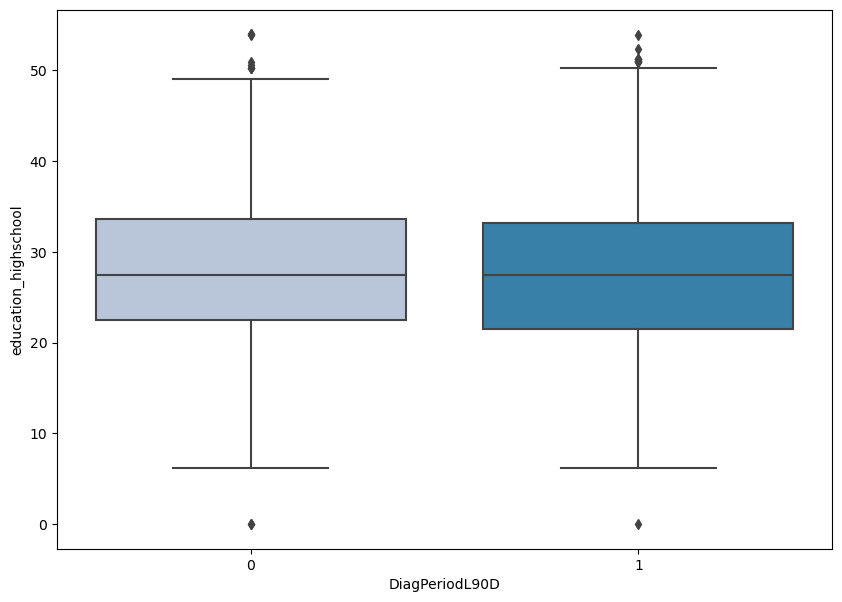

In [21]:
boxplot('education_highschool')

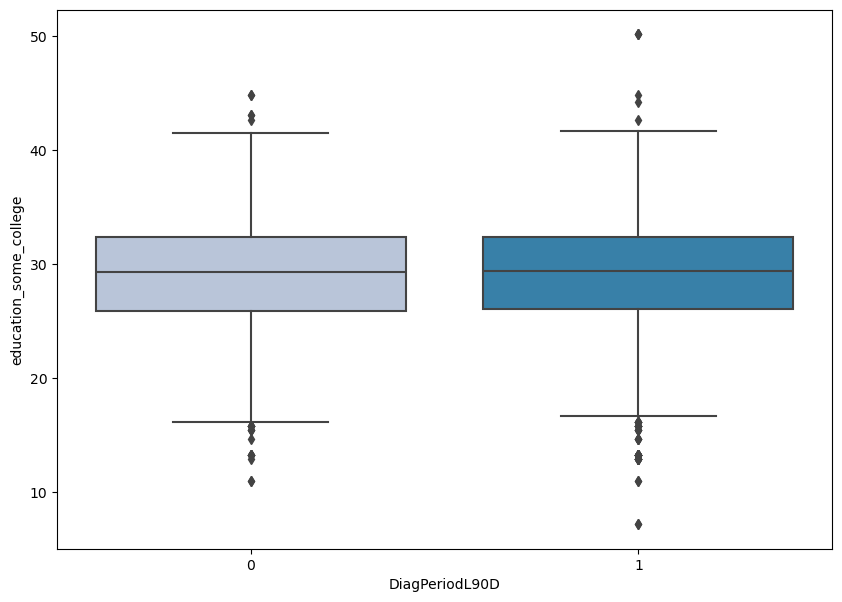

In [22]:
boxplot('education_some_college')

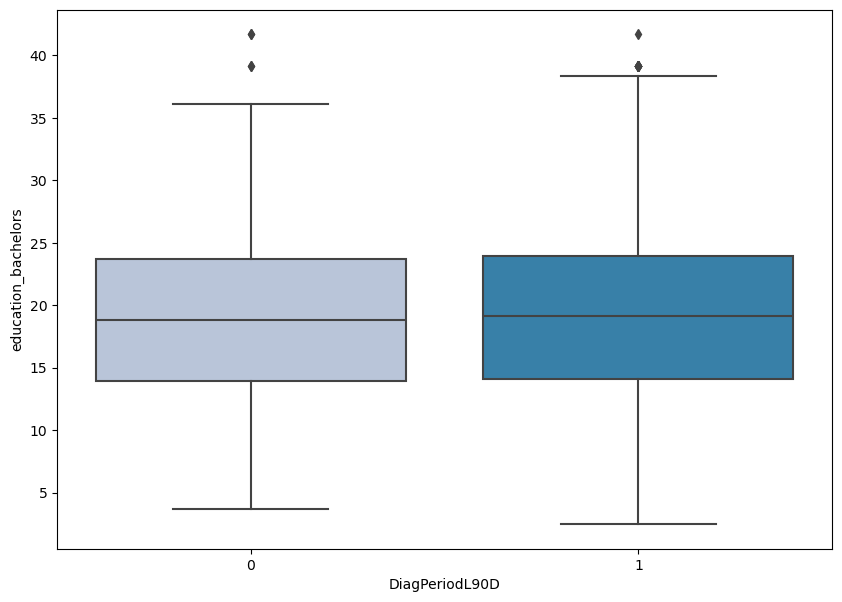

In [23]:
boxplot('education_bachelors')

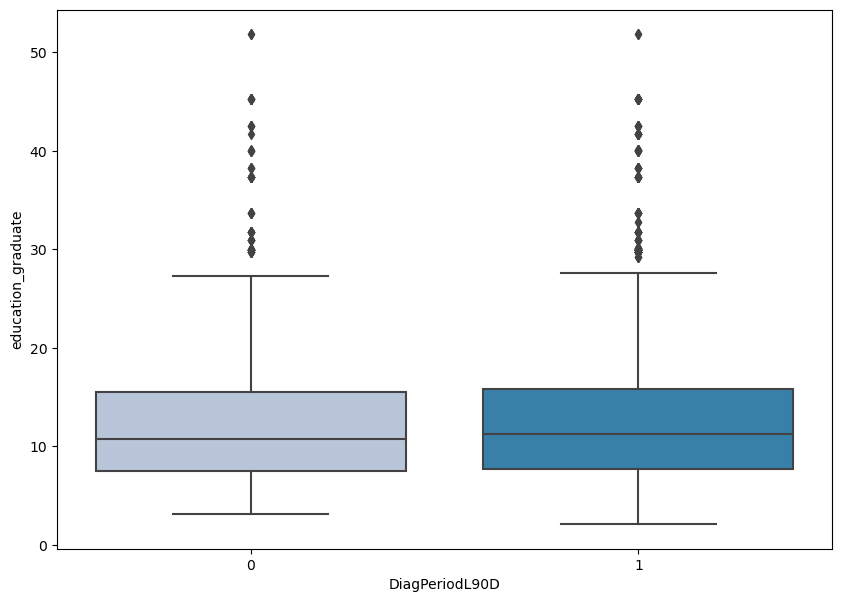

In [24]:
boxplot('education_graduate')

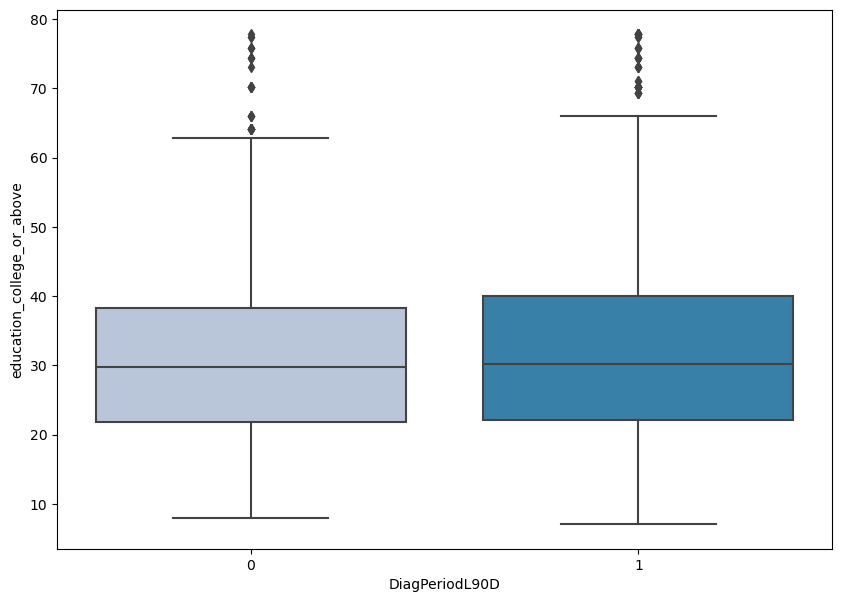

In [25]:
boxplot('education_college_or_above')

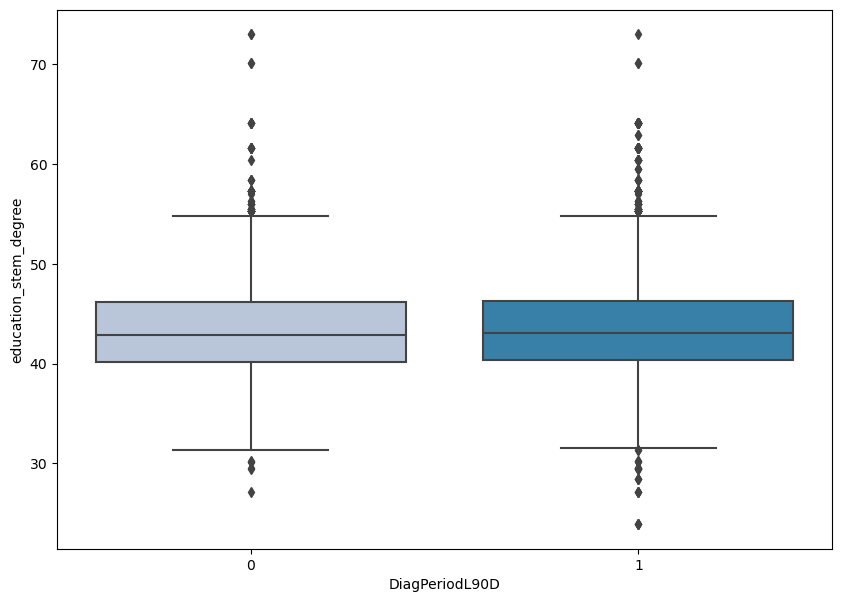

In [26]:
boxplot('education_stem_degree')

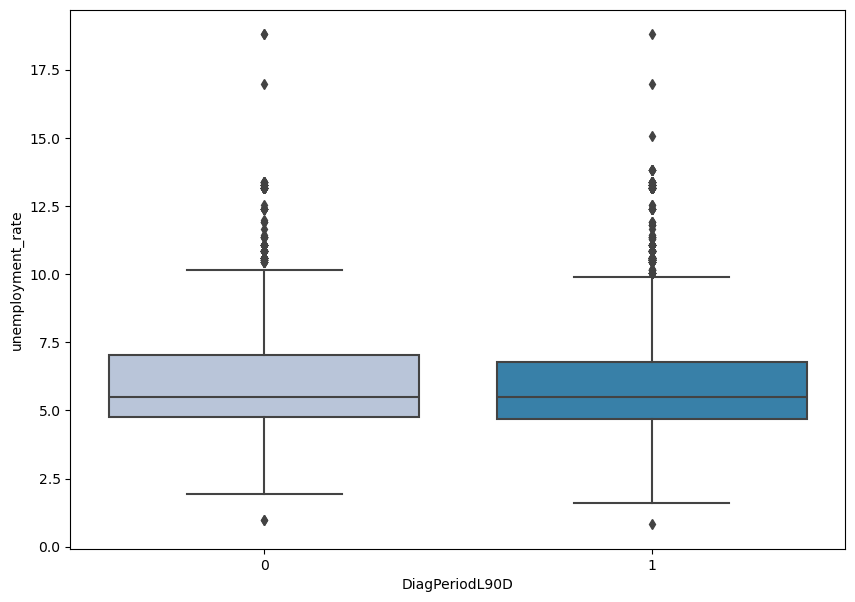

In [27]:
boxplot('unemployment_rate')

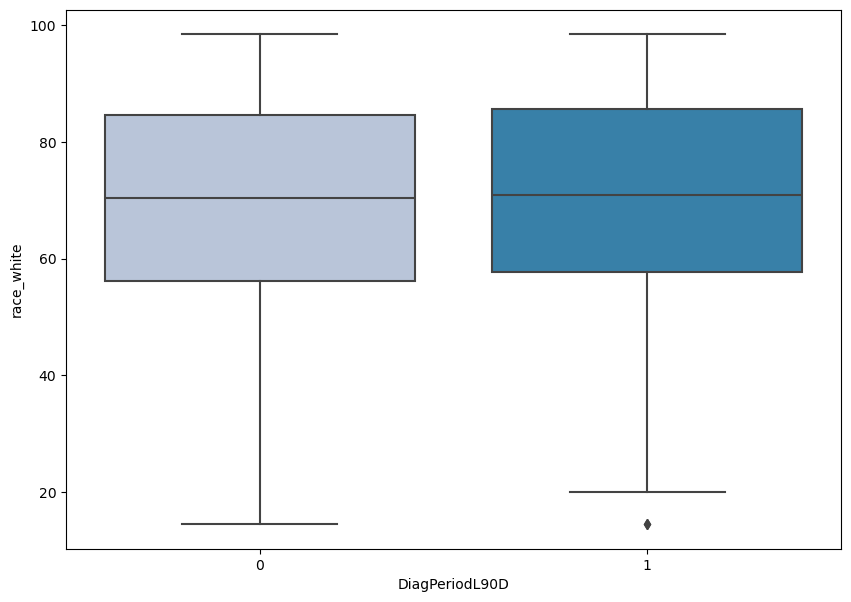

In [28]:
boxplot('race_white')

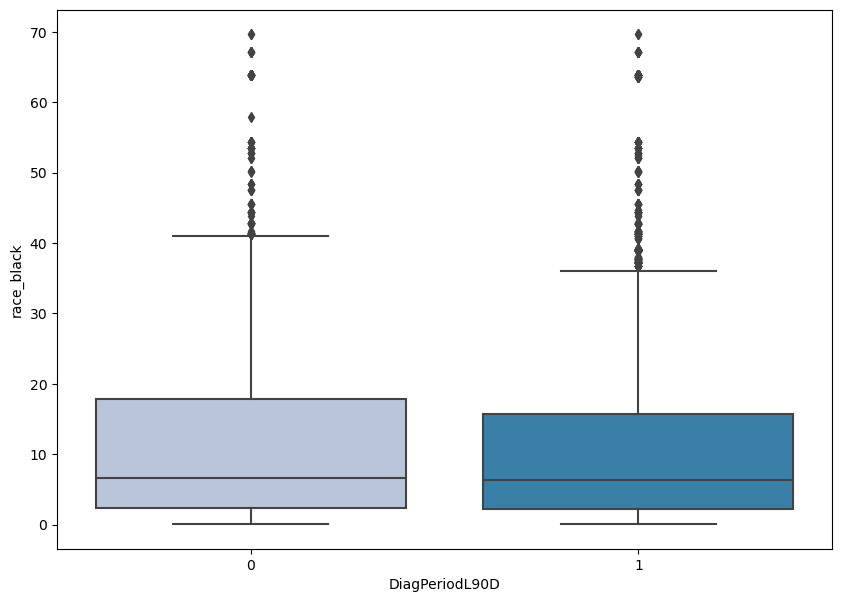

In [29]:
boxplot('race_black')

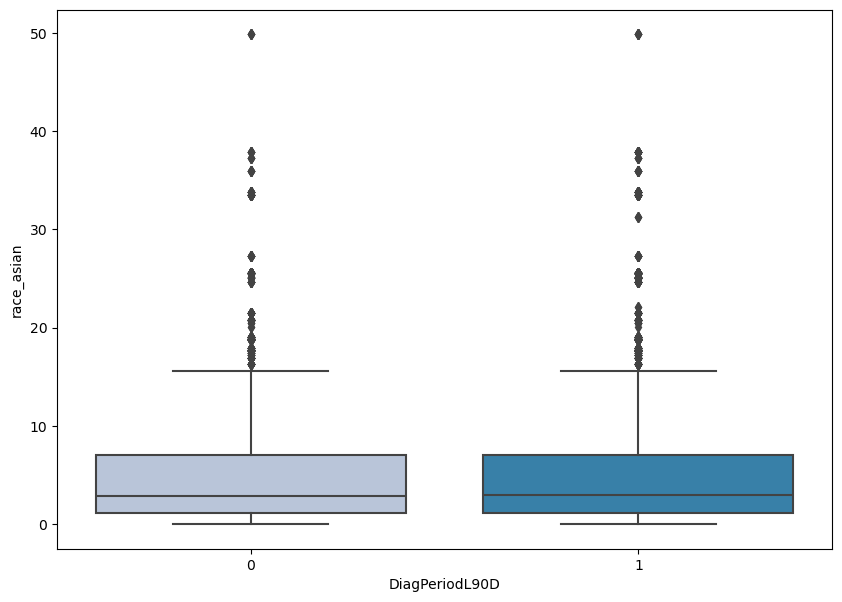

In [30]:
boxplot('race_asian')

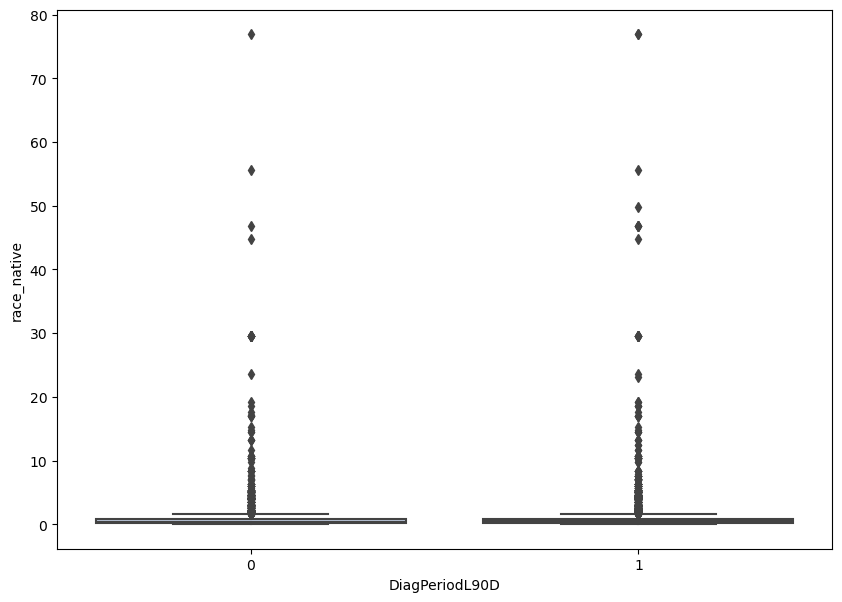

In [31]:
boxplot('race_native')

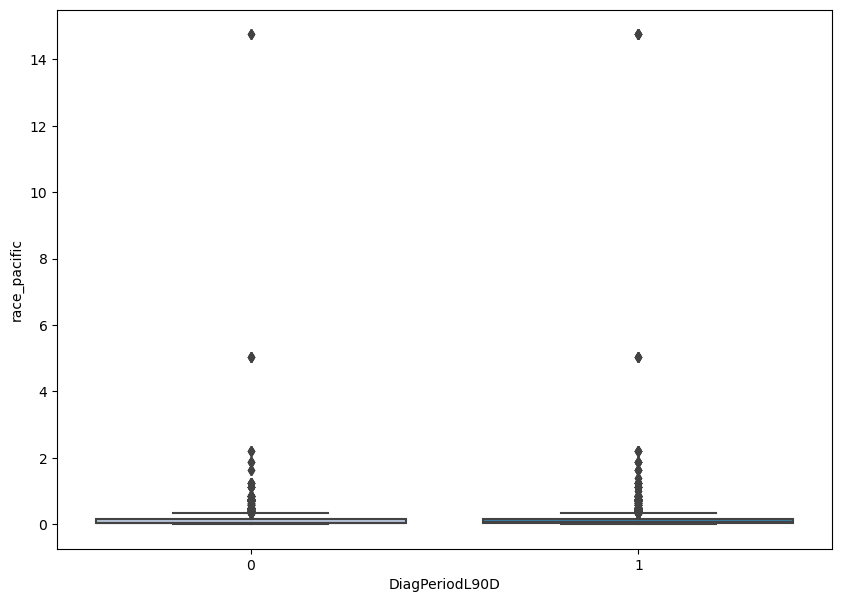

In [32]:
boxplot('race_pacific')

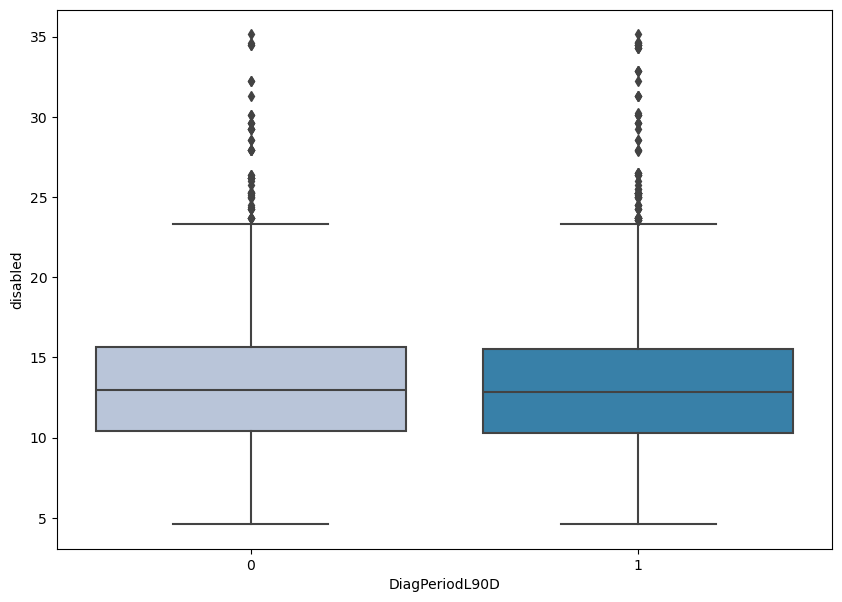

In [33]:
boxplot('disabled')

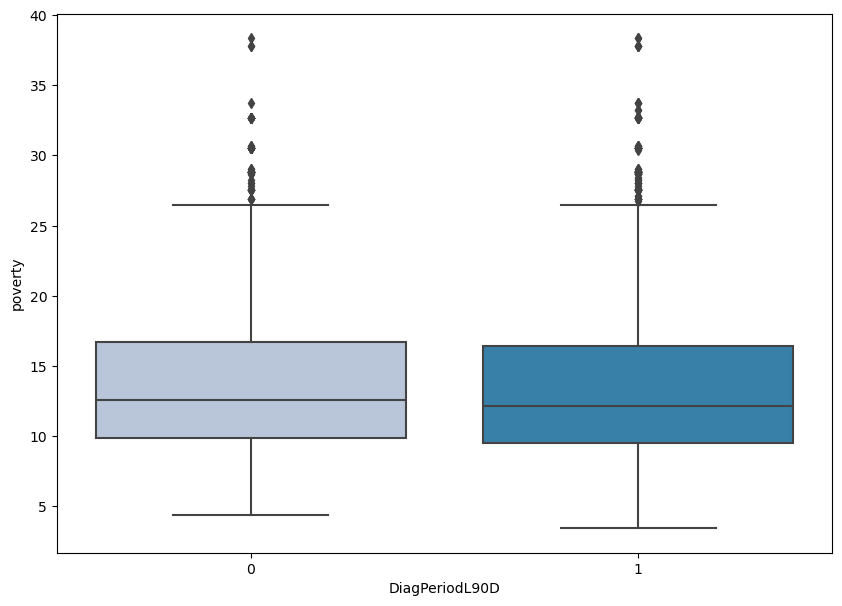

In [34]:
boxplot('poverty')

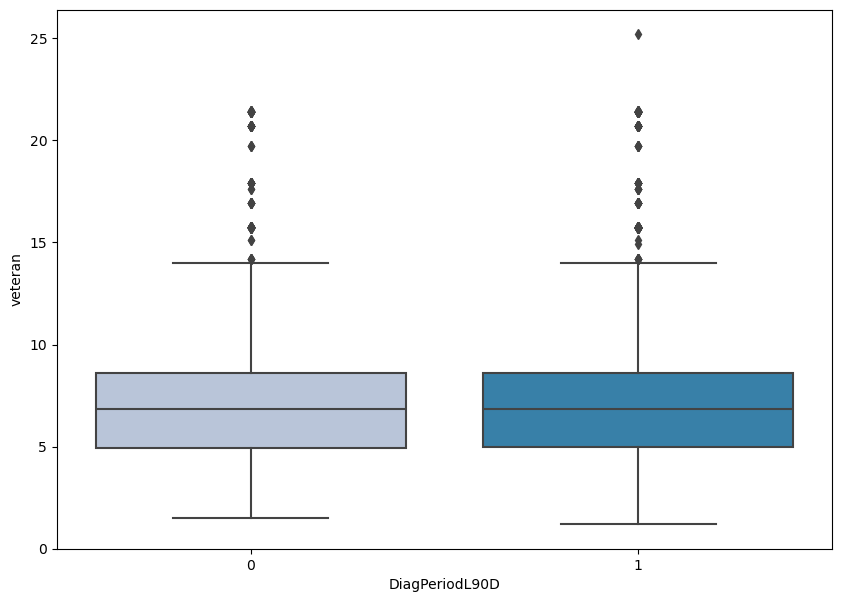

In [35]:
boxplot('veteran')

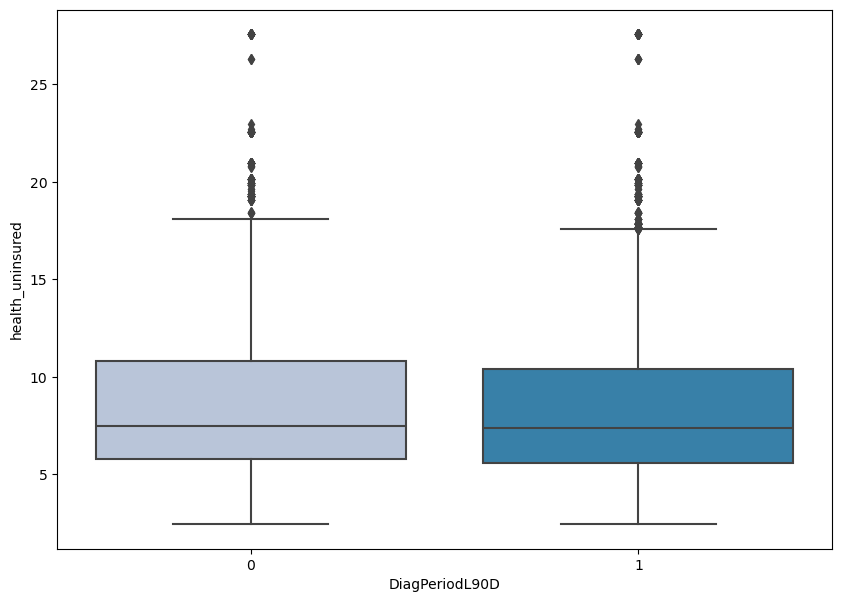

In [36]:
boxplot('health_uninsured')

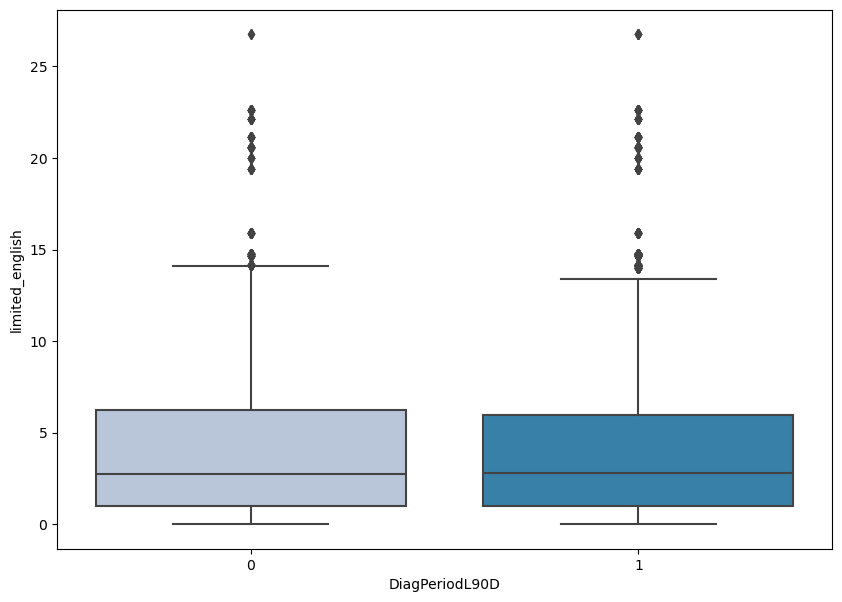

In [37]:
boxplot('limited_english')

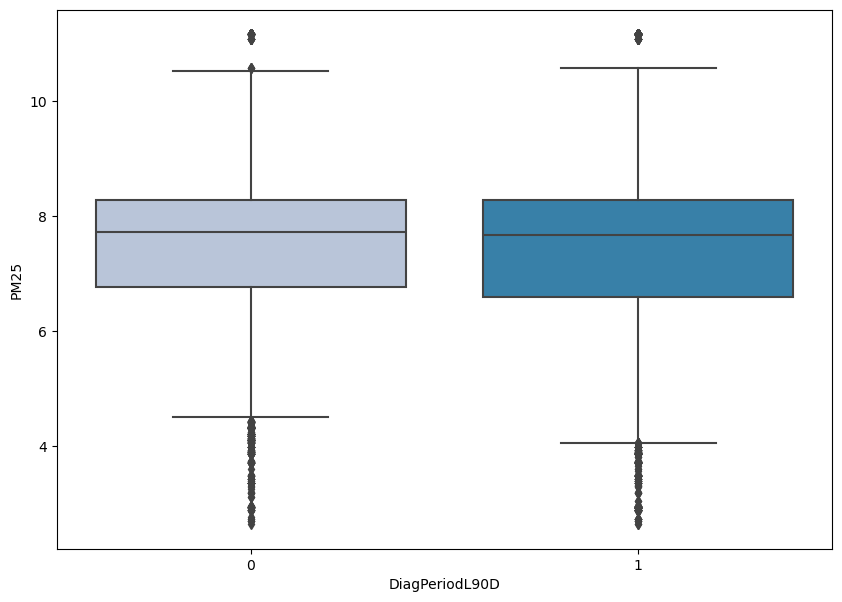

In [38]:
boxplot('PM25')

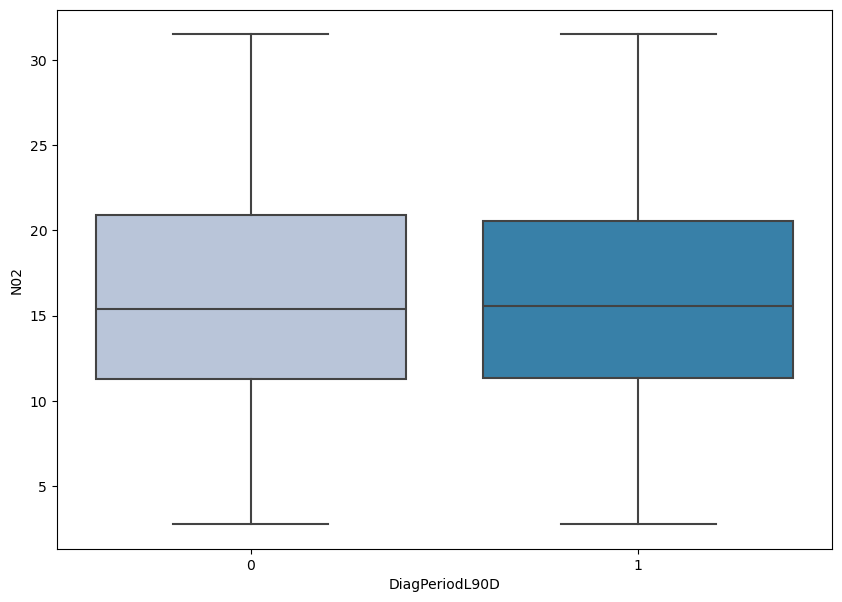

In [39]:
boxplot('N02')

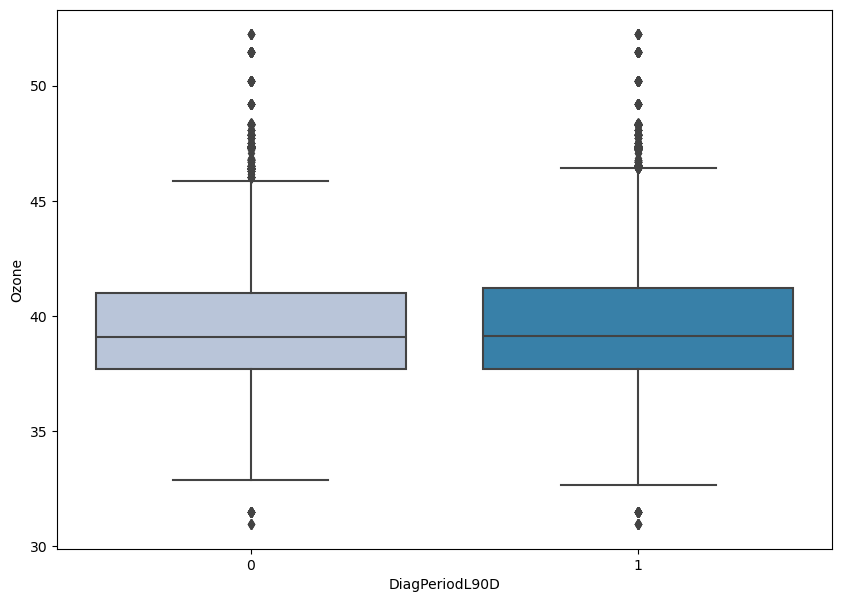

In [40]:
boxplot('Ozone')

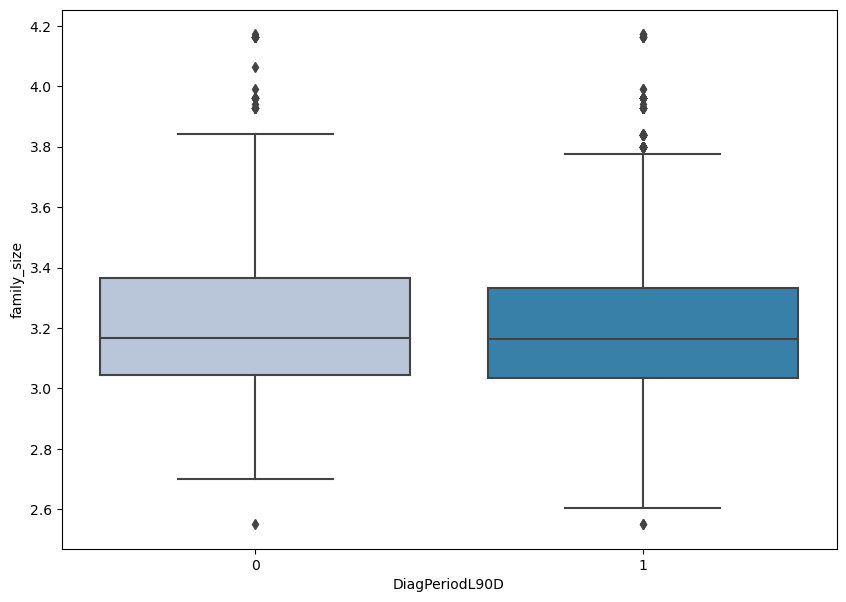

In [41]:
boxplot('family_size')

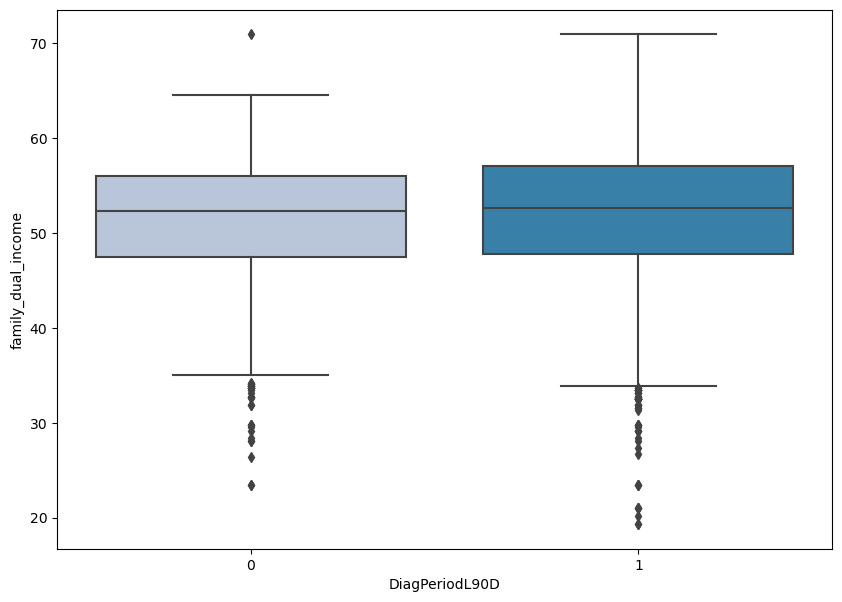

In [42]:
boxplot('family_dual_income')

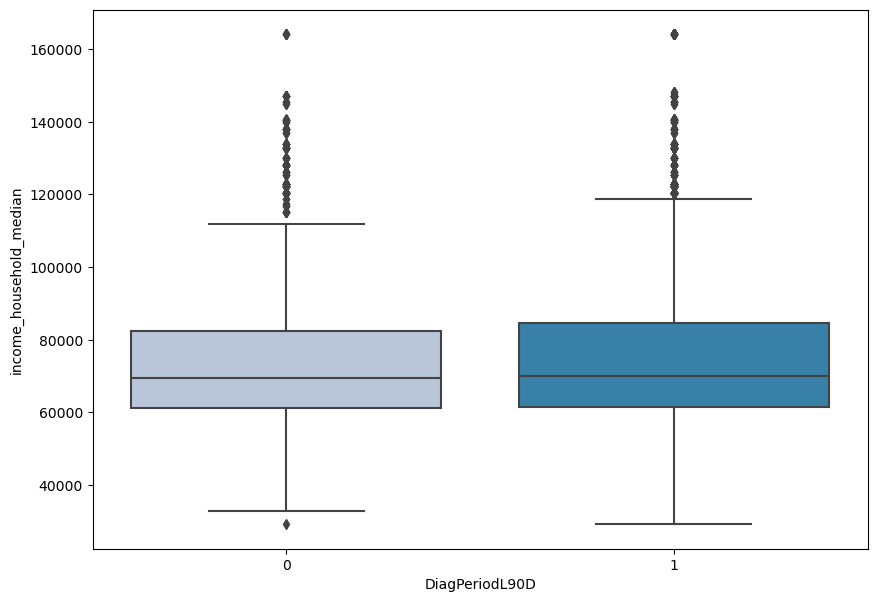

In [43]:
boxplot('income_household_median')

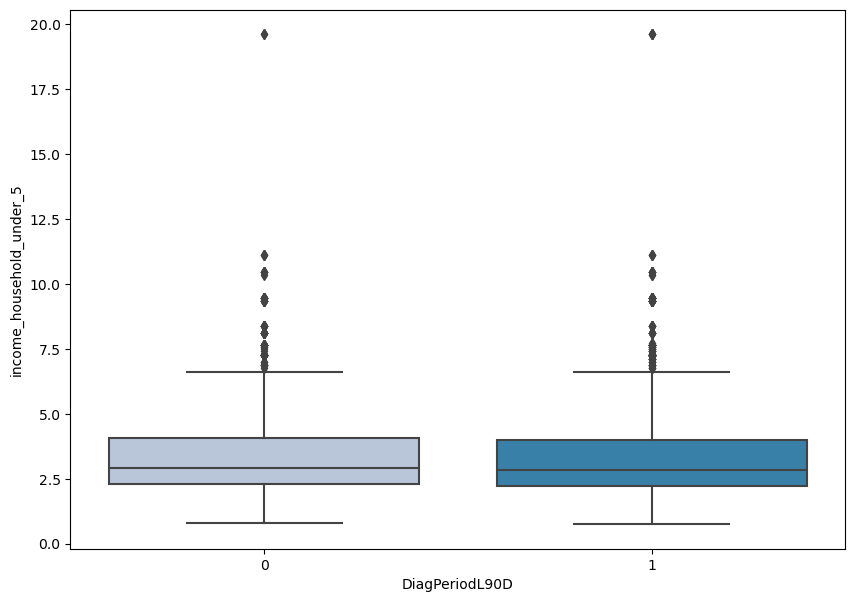

In [44]:
boxplot('income_household_under_5')

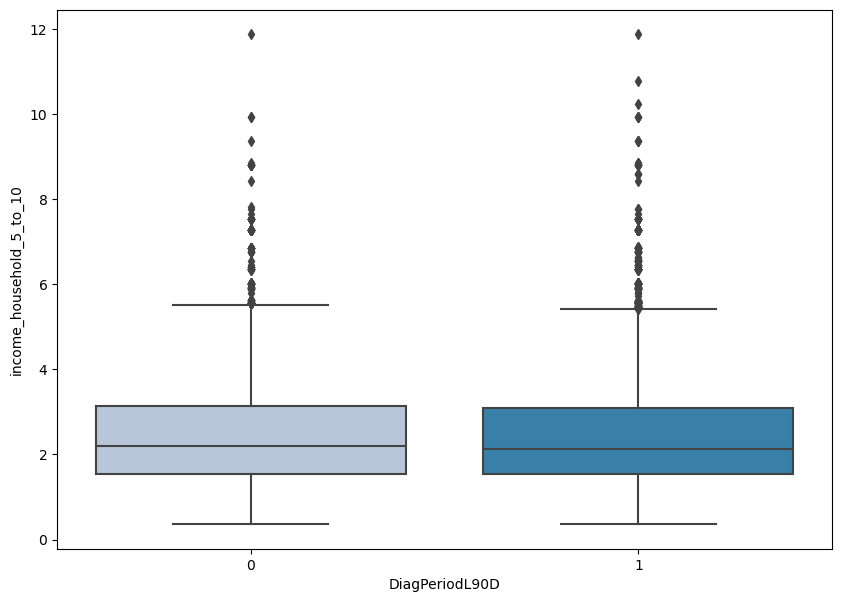

In [45]:
boxplot('income_household_5_to_10')

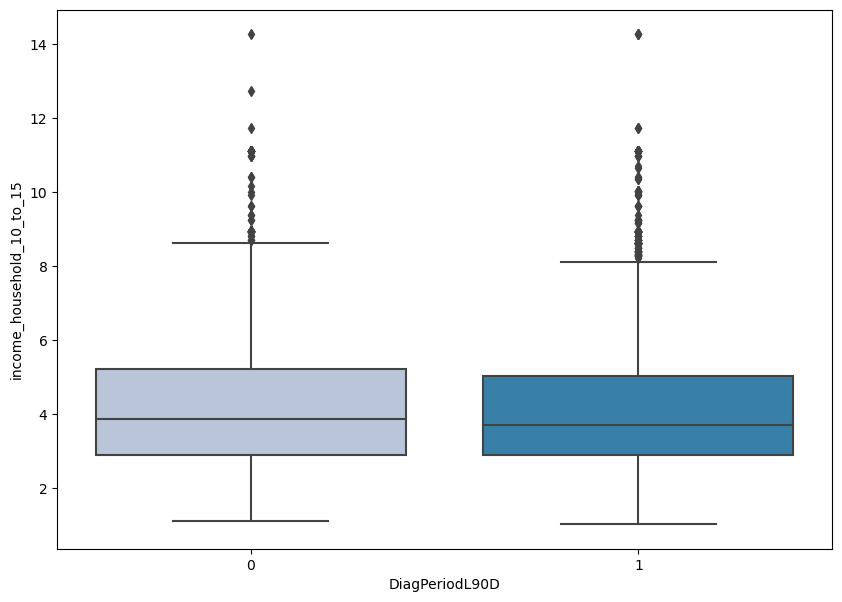

In [46]:
boxplot('income_household_10_to_15')

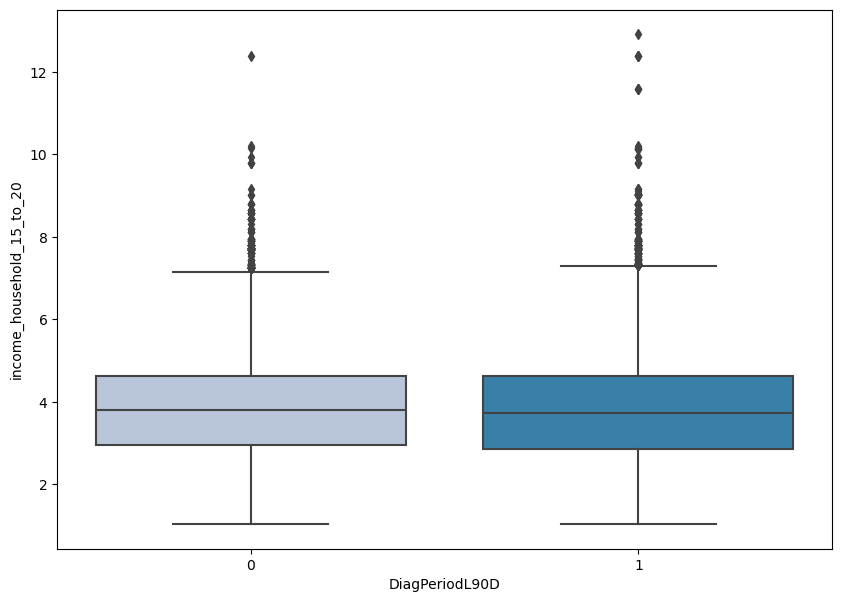

In [47]:
boxplot('income_household_15_to_20')

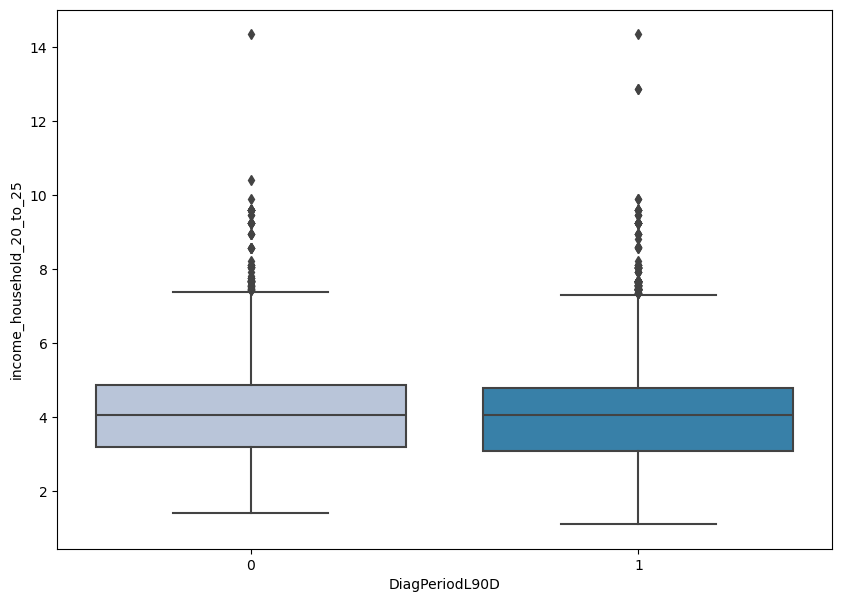

In [48]:
boxplot('income_household_20_to_25')

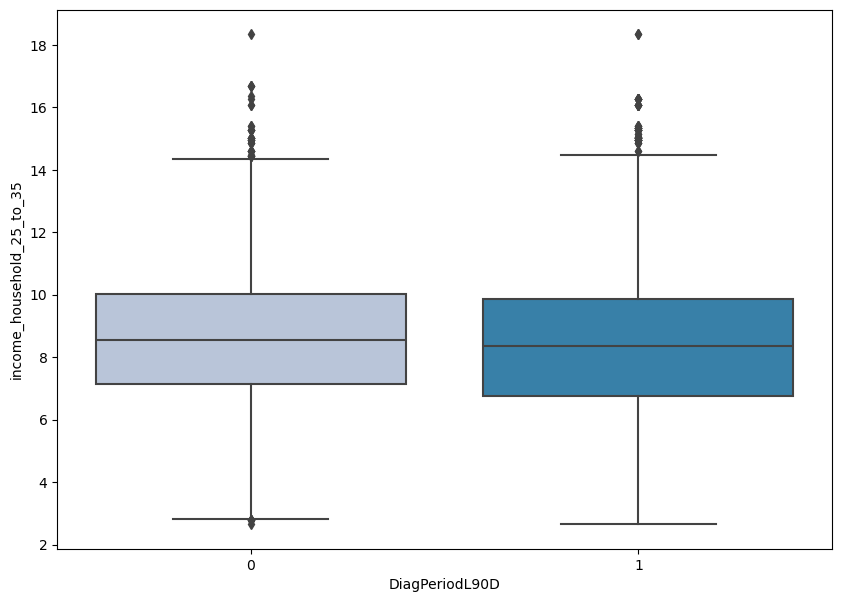

In [49]:
boxplot('income_household_25_to_35')

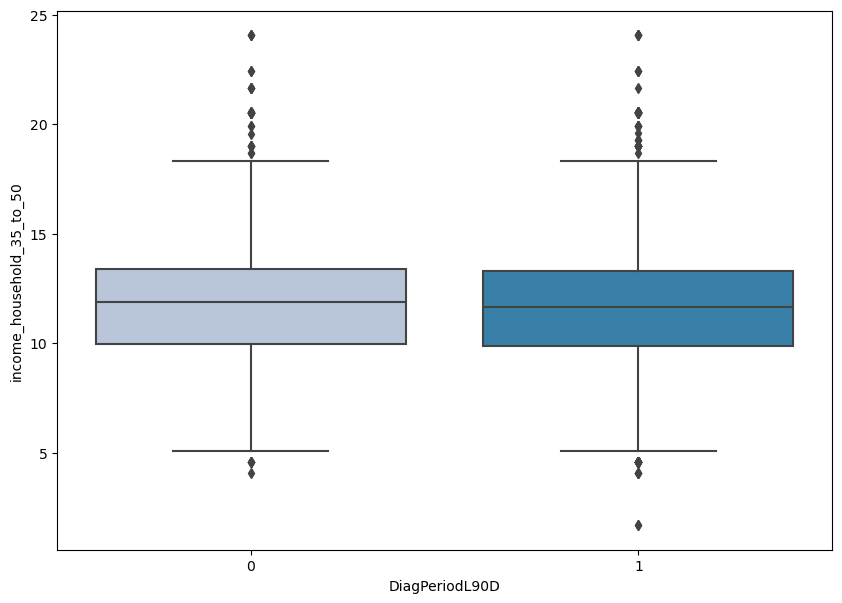

In [50]:
boxplot('income_household_35_to_50')

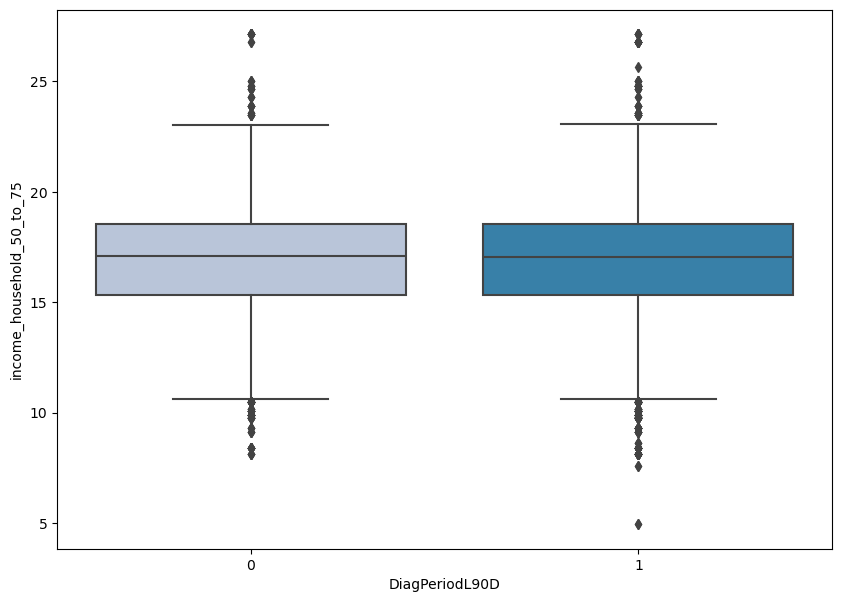

In [51]:
boxplot('income_household_50_to_75')

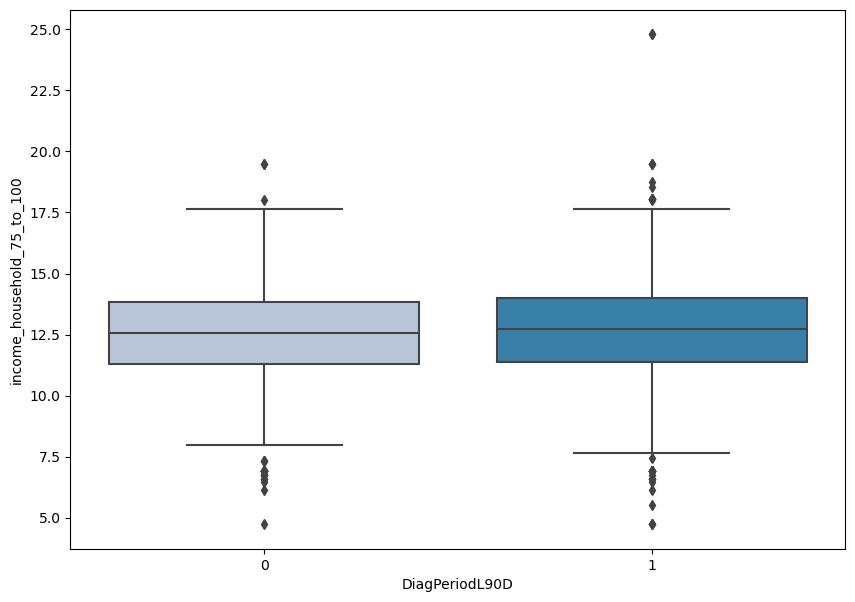

In [52]:
boxplot('income_household_75_to_100')

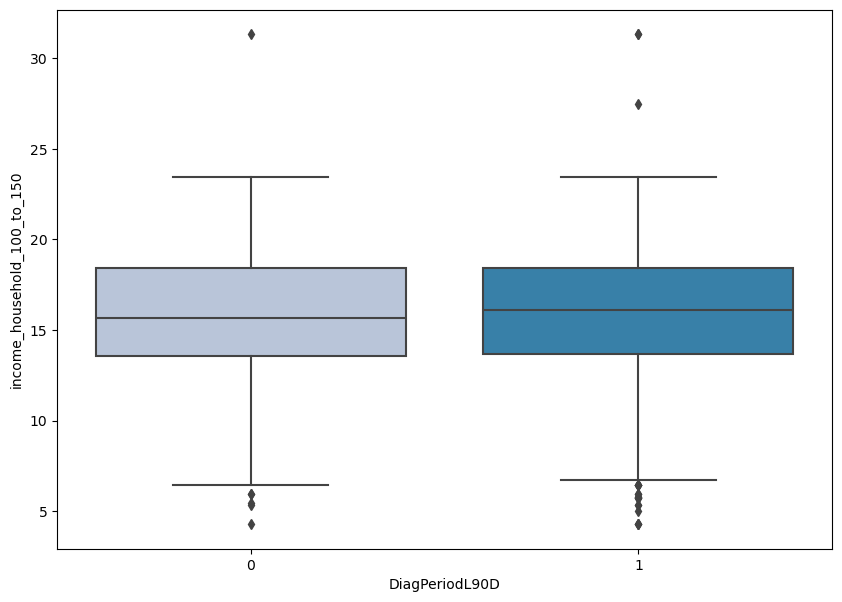

In [53]:
boxplot('income_household_100_to_150')

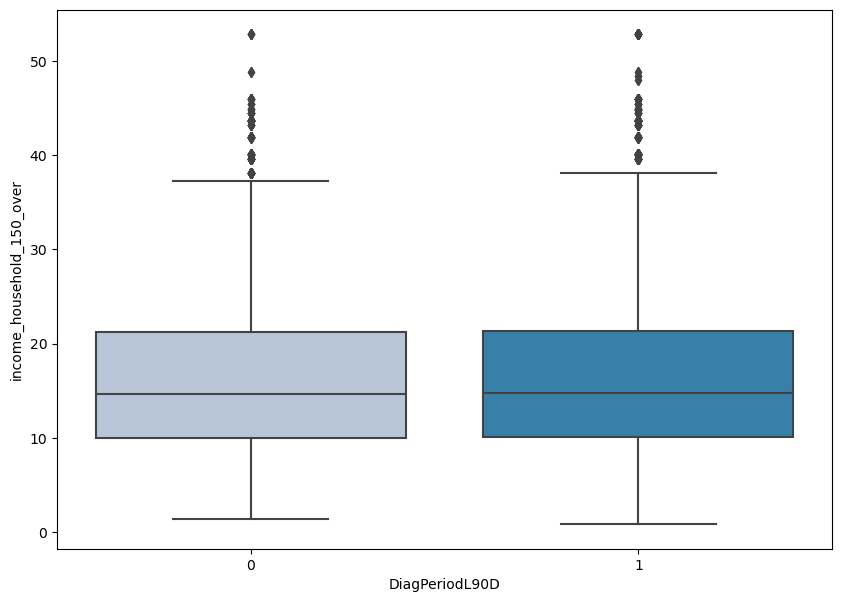

In [54]:
boxplot('income_household_150_over')

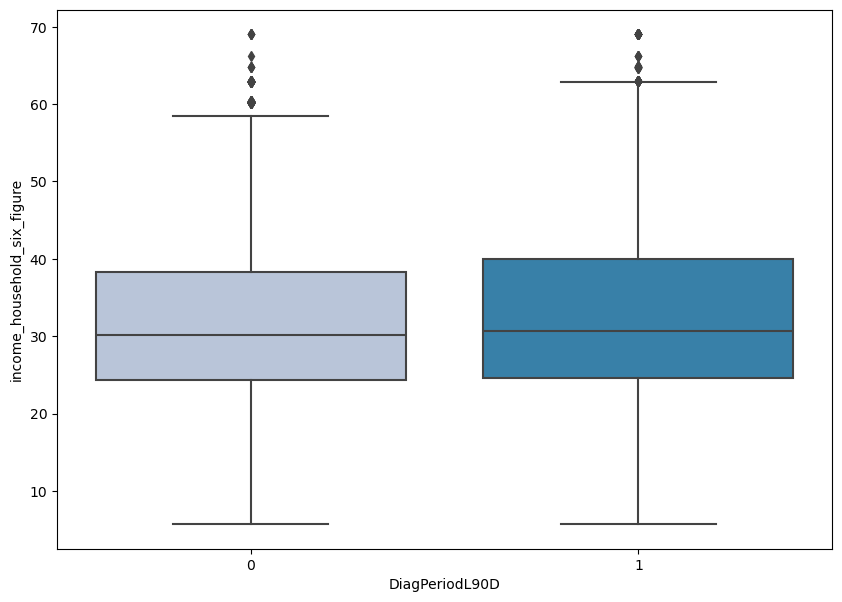

In [55]:
boxplot('income_household_six_figure')

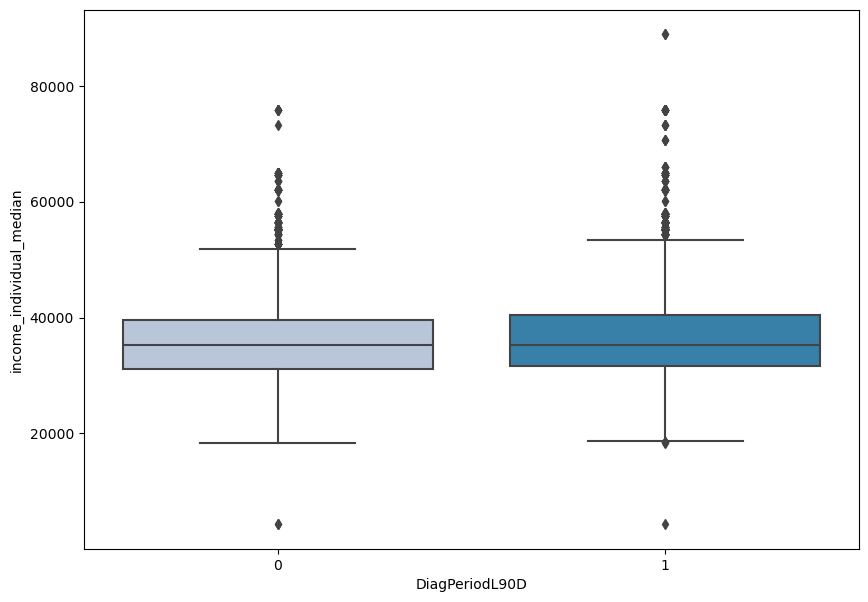

In [56]:
boxplot('income_individual_median')

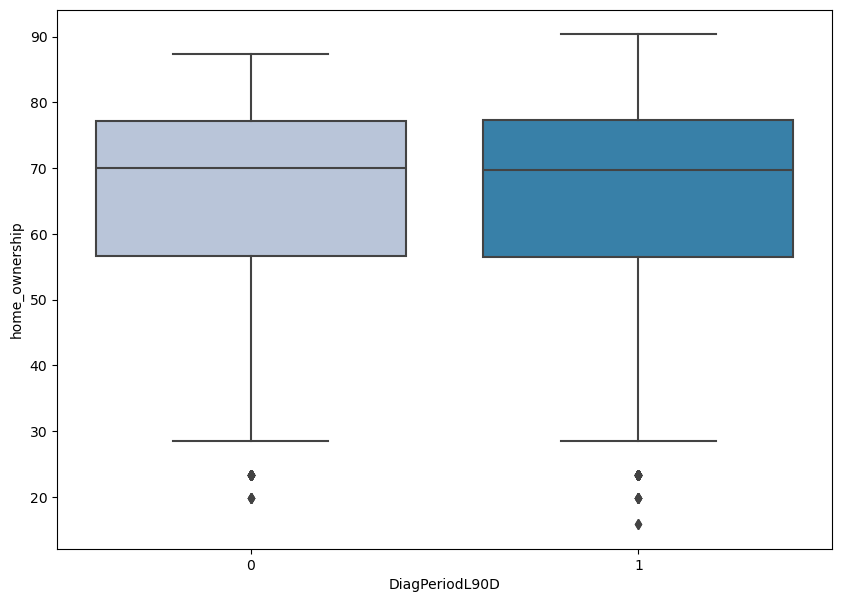

In [57]:
boxplot('home_ownership')

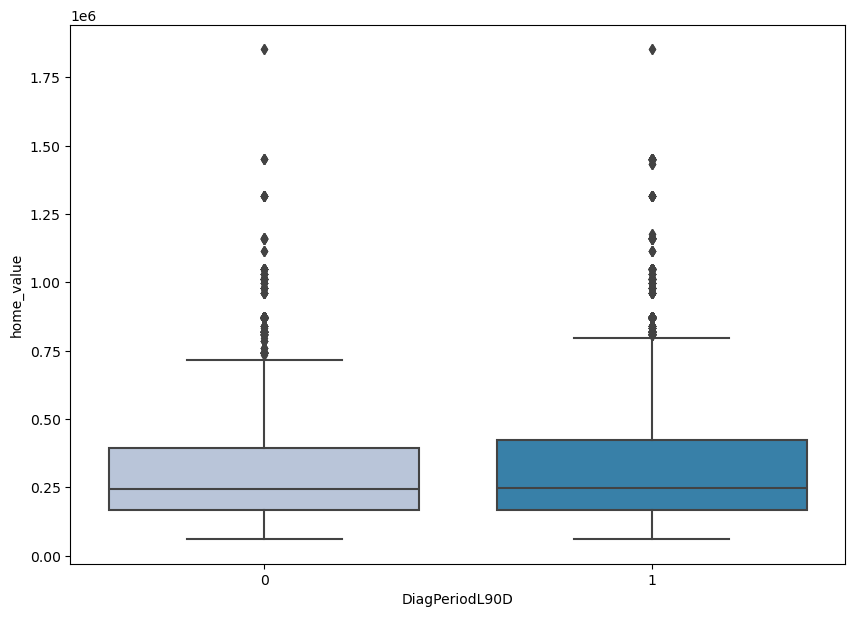

In [58]:
boxplot('home_value')

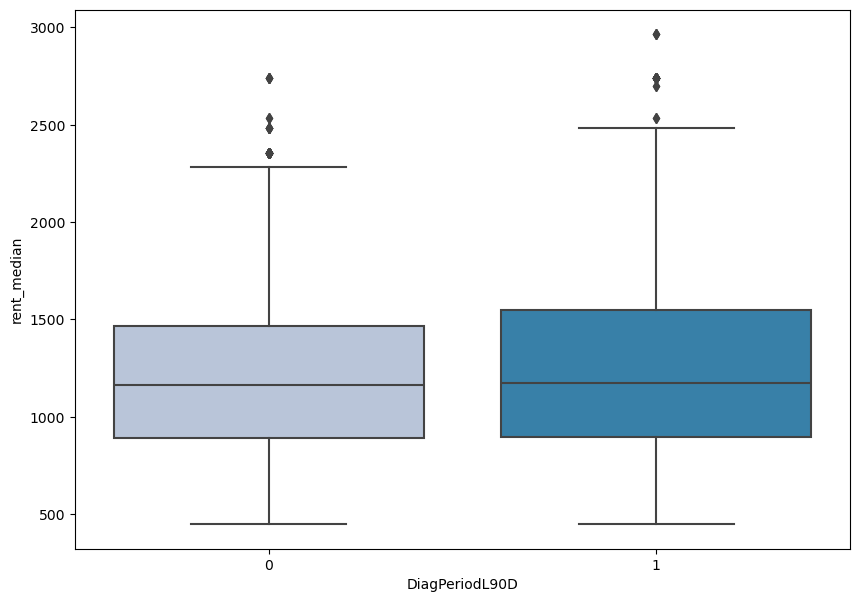

In [59]:
boxplot('rent_median')

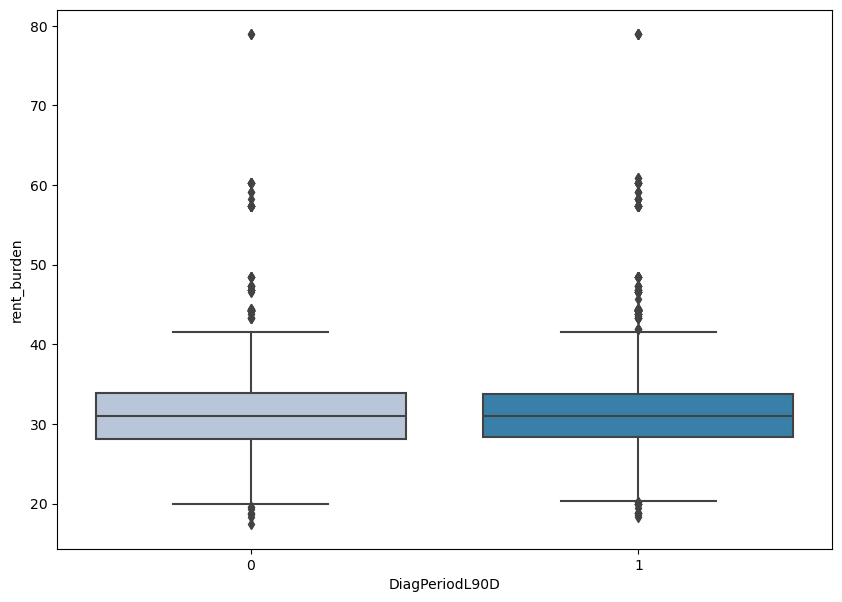

In [60]:
boxplot('rent_burden')

### Pairplot

In [62]:
df_train_num = df_train.select_dtypes(include = ['float', 'int']).drop(columns = ['patient_id', 'patient_zip3'])

In [63]:
df_train_num.head()

,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,84,NaN,31437.75000,1189.562500,30.642857,16.014286,15.542857,17.614286,14.014286,11.614286,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,62,28.49,39121.87879,2295.939394,38.200000,11.878788,13.354545,14.230303,13.418182,13.333333,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,43,38.09,21996.68333,626.236667,37.906667,13.028333,14.463333,12.531667,13.545000,12.860000,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,45,NaN,32795.32558,1896.220930,42.871429,10.071429,12.135714,12.538095,12.464286,12.650000,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,55,NaN,10886.26000,116.886000,43.473469,10.824000,13.976000,9.492000,10.364000,12.600000,...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


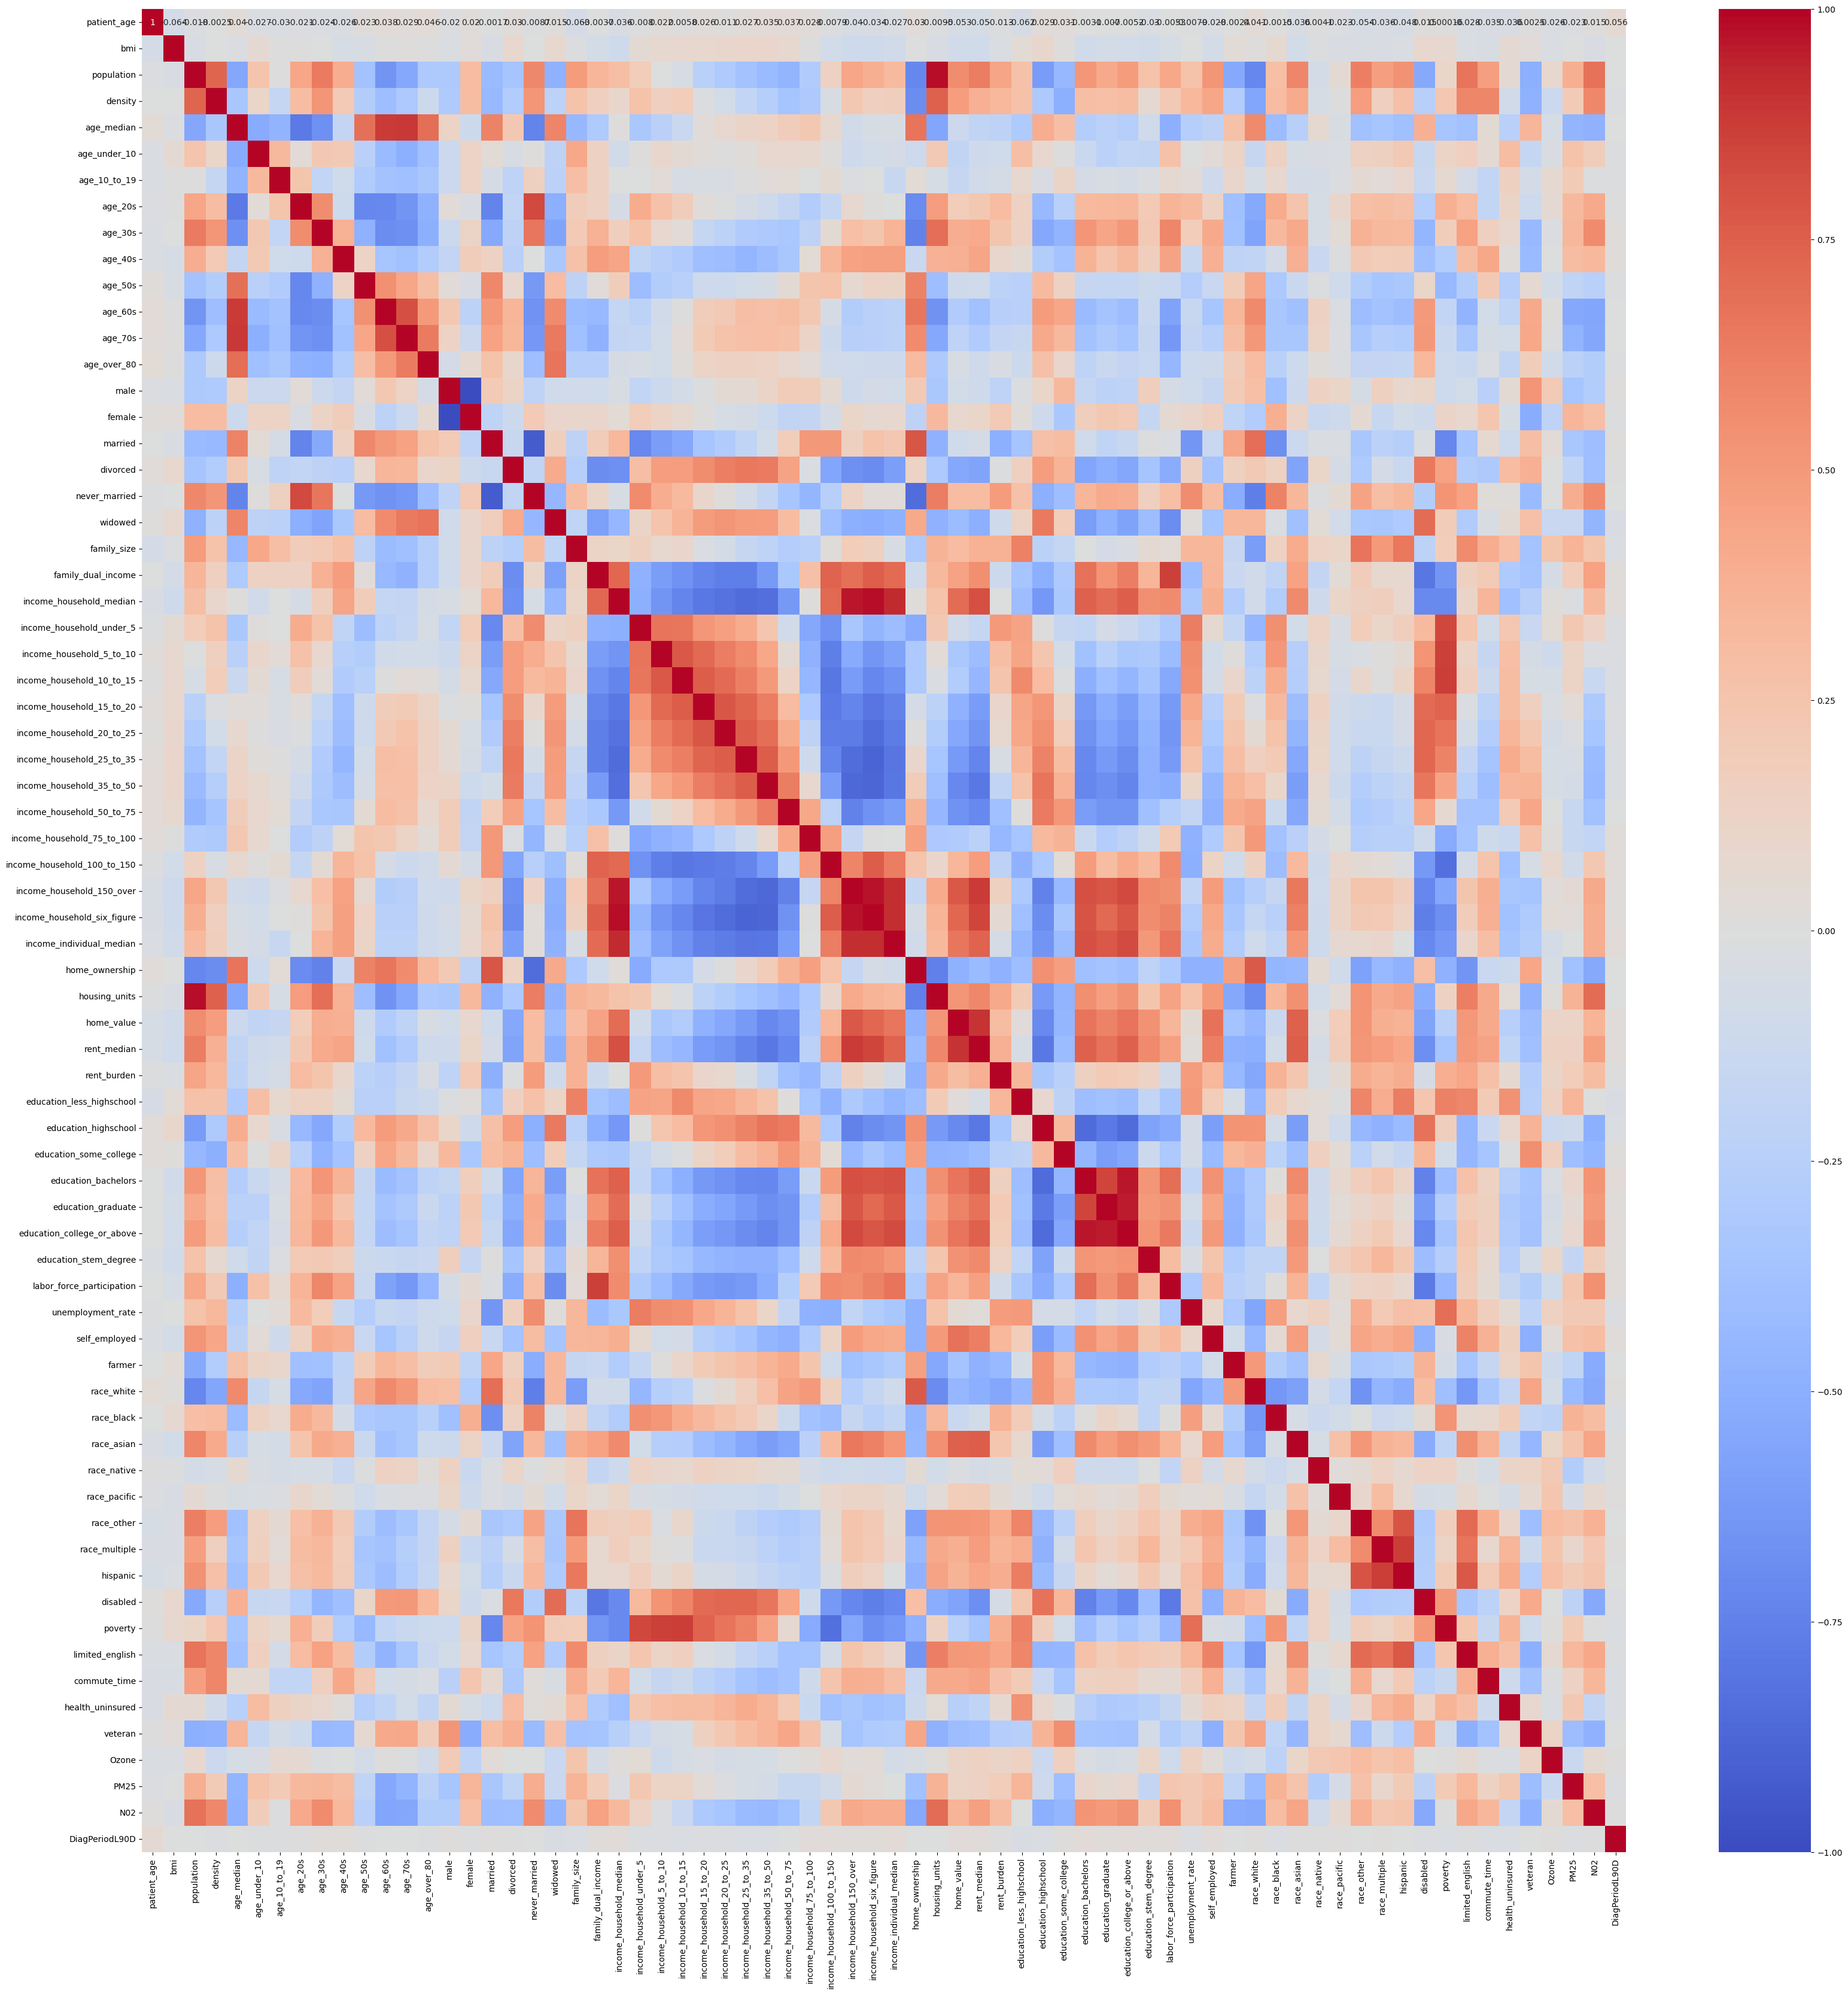

In [64]:
plt.figure(figsize=(40,40))
sns.heatmap(df_train_num.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')
plt.show()

In [65]:
df_train_num.corr()

,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
patient_age,1.000000,-0.063885,-0.018048,-0.002532,0.040121,-0.026532,-0.029747,-0.020619,-0.023544,-0.025756,...,0.015360,0.000160,-0.028202,-0.034837,-0.036265,0.002469,-0.025899,-0.023002,0.014842,0.055634
bmi,-0.063885,1.000000,-0.037956,-0.003744,-0.023318,0.056463,0.006254,0.001980,-0.005806,-0.047308,...,0.079222,0.072223,-0.026662,-0.041276,0.061944,0.027936,-0.028554,-0.000955,-0.038425,-0.005710
population,-0.018048,-0.037956,1.000000,0.730978,-0.550534,0.254734,0.000769,0.437070,0.636995,0.396377,...,-0.533190,0.102763,0.671453,0.471734,0.057856,-0.500773,0.081358,0.385453,0.672527,-0.006576
density,-0.002532,-0.003744,0.730978,1.000000,-0.335151,0.105550,-0.164597,0.299683,0.522595,0.207678,...,-0.256186,0.229418,0.586164,0.590180,-0.091536,-0.490779,-0.125028,0.199350,0.578692,-0.017286
age_median,0.040121,-0.023318,-0.550534,-0.335151,1.000000,-0.530657,-0.471295,-0.784668,-0.678690,-0.173072,...,0.377319,-0.348703,-0.380492,0.054660,-0.248198,0.346022,-0.053456,-0.462901,-0.487052,-0.000405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
veteran,0.002469,0.027936,-0.500773,-0.490779,0.346022,-0.169988,-0.077042,-0.115530,-0.434289,-0.422221,...,0.408566,-0.099426,-0.493361,-0.373883,0.080997,1.000000,0.122304,-0.408331,-0.479849,-0.001031
Ozone,-0.025899,-0.028554,0.081358,-0.125028,-0.053456,-0.037017,0.067999,0.061217,-0.019200,-0.001009,...,-0.004815,0.010937,0.061121,-0.015598,-0.029278,0.122304,1.000000,-0.136923,0.055694,0.007883
PM25,-0.023002,-0.000955,0.385453,0.199350,-0.462901,0.265457,0.201937,0.323625,0.342040,0.298030,...,-0.217333,0.199358,0.331874,0.137931,0.222733,-0.408331,-0.136923,1.000000,0.285042,-0.016500
N02,0.014842,-0.038425,0.672527,0.578692,-0.487052,0.177107,-0.014700,0.420146,0.567323,0.331297,...,-0.531991,0.002561,0.427857,0.339252,-0.174115,-0.479849,0.055694,0.285042,1.000000,0.000763


## Data Cleaning

In [129]:
df_train_num = df_train.select_dtypes(include = ['float', 'int']).drop(columns = ['patient_id', 'patient_zip3', 'bmi'])

In [132]:
df_train_num.columns

Index(['patient_age', 'population', 'density', 'age_median', 'age_under_10',
       'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced',
       'never_married', 'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'income_household_150_over',
       'income_household_six_figure', 'income_individual_median',
       'home_ownership', 'housing_units', 'home_value', 'rent_median',
       'rent_burden', 'education_less_highschool', 'education_highschool',
       'education_some_college', 'education_bachelors', 'education_graduate',
       'education_co

In [134]:
df_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   patient_age                  12906 non-null  int64  
 1   population                   12905 non-null  float64
 2   density                      12905 non-null  float64
 3   age_median                   12905 non-null  float64
 4   age_under_10                 12905 non-null  float64
 5   age_10_to_19                 12905 non-null  float64
 6   age_20s                      12905 non-null  float64
 7   age_30s                      12905 non-null  float64
 8   age_40s                      12905 non-null  float64
 9   age_50s                      12905 non-null  float64
 10  age_60s                      12905 non-null  float64
 11  age_70s                      12905 non-null  float64
 12  age_over_80                  12905 non-null  float64
 13  male            

In [ ]:
df_train_num.dropna([

## EDA: Conclusions